# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("SeoulBikeData.csv",encoding='unicode_escape')

# Analysis of data 

In [3]:
train = df # extra variable, made in order to use it for visualization

In [4]:
train.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##### The mean value and median values for all features are more or less close to each other, suggesting no special outlier treatment is needed. Nevertheless, we would use 'outlier specific regression' while trying different models. We would also plot box plots and distribution to get better idea.

In [5]:
train.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

##### We can see there is no null value in our dataset.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
Date                         8760 non-null object
Rented Bike Count            8760 non-null int64
Hour                         8760 non-null int64
Temperature(°C)              8760 non-null float64
Humidity(%)                  8760 non-null int64
Wind speed (m/s)             8760 non-null float64
Visibility (10m)             8760 non-null int64
Dew point temperature(°C)    8760 non-null float64
Solar Radiation (MJ/m2)      8760 non-null float64
Rainfall(mm)                 8760 non-null float64
Snowfall (cm)                8760 non-null float64
Seasons                      8760 non-null object
Holiday                      8760 non-null object
Functioning Day              8760 non-null object
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


##### One important thing to observe here, some variables have 'object datatype', but since we are working with regression models, we need them in 'int/float/categorical'. We will do this conversion in the processing part. 

# Data Preparation and Pre-processing

In [7]:
train.Date = pd.to_datetime(train.Date, format='%d-%m-%Y')
train['year'] = train.Date.dt.year
train['Rainfall(cm)'] = train['Rainfall(mm)'] / 10
train['Seasons'] = train['Seasons'].astype('category')
train['Holiday'] = train['Holiday'].astype('category')
train['Functioning Day'] = train['Functioning Day'].astype('category')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
Date                         8760 non-null datetime64[ns]
Rented Bike Count            8760 non-null int64
Hour                         8760 non-null int64
Temperature(°C)              8760 non-null float64
Humidity(%)                  8760 non-null int64
Wind speed (m/s)             8760 non-null float64
Visibility (10m)             8760 non-null int64
Dew point temperature(°C)    8760 non-null float64
Solar Radiation (MJ/m2)      8760 non-null float64
Rainfall(mm)                 8760 non-null float64
Snowfall (cm)                8760 non-null float64
Seasons                      8760 non-null category
Holiday                      8760 non-null category
Functioning Day              8760 non-null category
year                         8760 non-null int64
Rainfall(cm)                 8760 non-null float64
dtypes: category(3), datetime64[ns](1), float64(7), int64(5)
memory usage: 91

##### Now we have converted all the variables in proper format, we can see they are either categorical or int/float and we are ready to proceed. The date and time was also converted to DateTime object.

###### Plotting Distributions

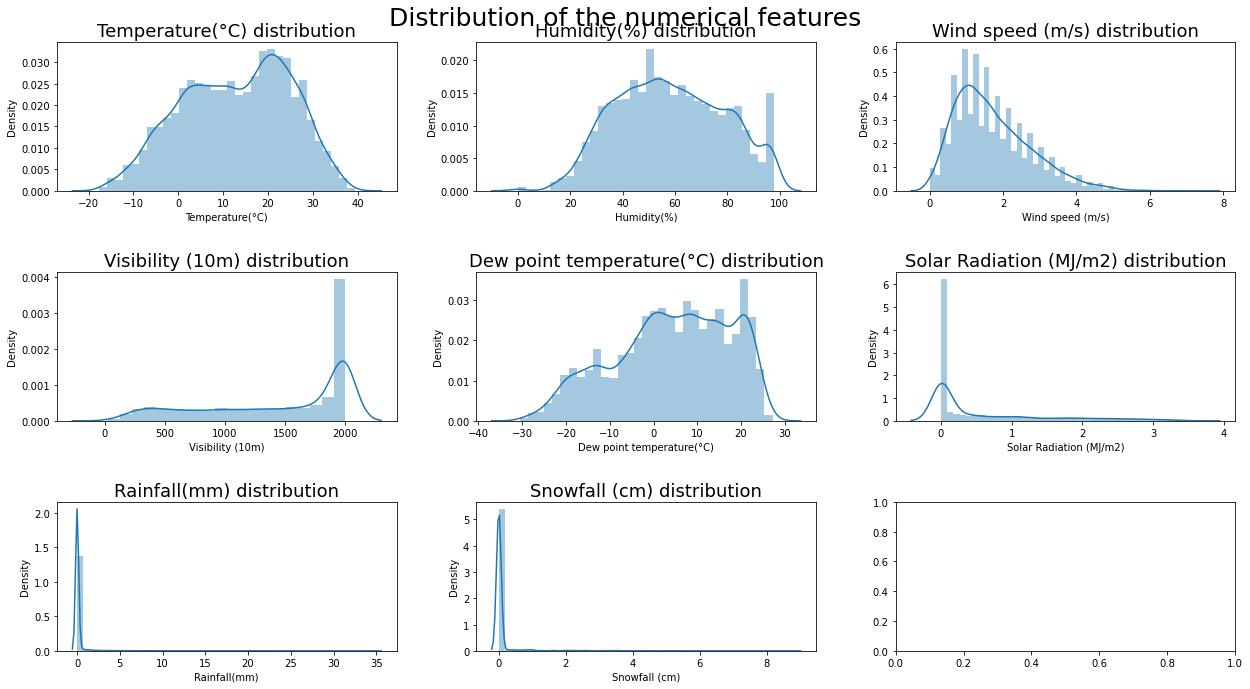

In [9]:
plt.subplots(3, 3,figsize=(18,10))

plt.subplots_adjust(top=1)
plt.suptitle("Distribution of the numerical features", fontsize=25) 


for i, col in enumerate(train[train.columns[3:-5]]):
    plt.subplot(3, 3, i+1)
    sns.distplot(train[col]).set_title("{} distribution".format(col), fontsize=18);
    plt.tight_layout(pad=3.0)

###### Plotting Co relation Matrix

This becomes important while feature selection, since features that have high corelation with out target variable might cause issues during model training. We keep a threshold of +-(60-70%)

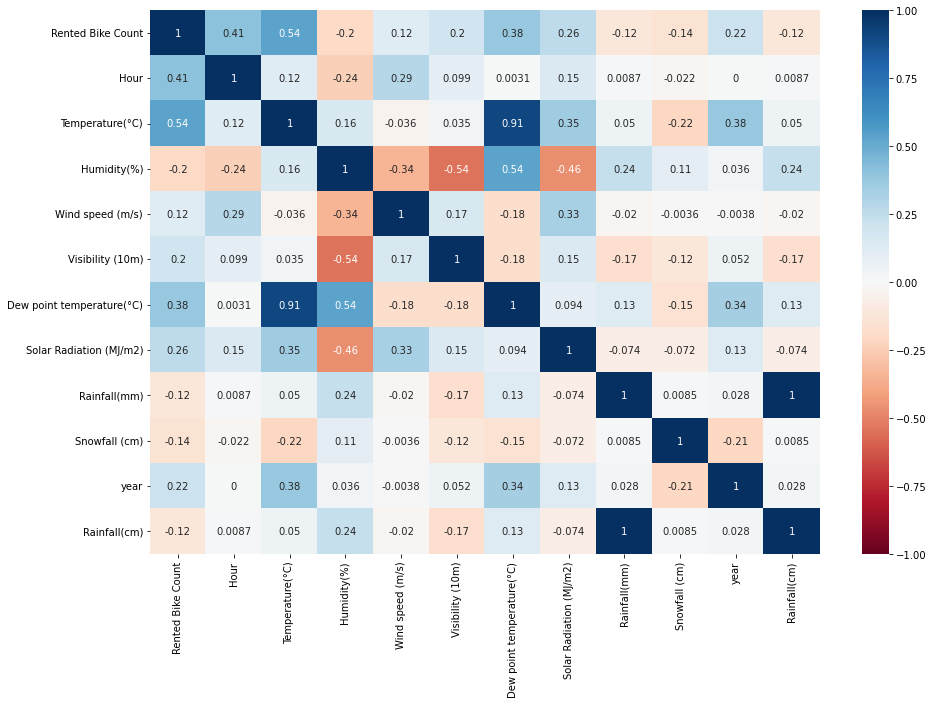

In [10]:
plt.figure(figsize=(15,10))

sns.heatmap(train.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True);

In [11]:
df = train # main variable, used during test train split.

##### We have dates corresponding to the number of rentals. So we plan to separate the Day, Month and Year from the Dates column and make then as a different feature. Adding this kind of feature induces better training and might be helpful to reduce the error, resulting into a better fit. 

In [13]:
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [14]:
df['WeekDay']=df["Date"].dt.day_name()

##### As stated, we have labelled days of week and weekeends. 

In [15]:
dayOfWeek = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df['week_end']= df['WeekDay'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
df['WeekDay']=df['WeekDay'].map(dayOfWeek)

In [16]:
df['Month']=df['Date'].dt.month

##### We see some features had a little skewed distribution, to fix that we apply logarithm to those features. 

In [17]:
df[['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)']] = df[['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)']].apply(np.log1p)

# Convert categorical variable into dummy/indicator variables.
df = pd.get_dummies(df, columns = ['Seasons','Holiday','Functioning Day'])
df= pd.get_dummies(df,columns=['Hour'])

##### Final Features

In [18]:
for col in df.columns:
    print(col)

Date
Rented Bike Count
Temperature(°C)
Humidity(%)
Wind speed (m/s)
Visibility (10m)
Dew point temperature(°C)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
year
Rainfall(cm)
WeekDay
week_end
Month
Seasons_Autumn
Seasons_Spring
Seasons_Summer
Seasons_Winter
Holiday_Holiday
Holiday_No Holiday
Functioning Day_No
Functioning Day_Yes
Hour_0
Hour_1
Hour_2
Hour_3
Hour_4
Hour_5
Hour_6
Hour_7
Hour_8
Hour_9
Hour_10
Hour_11
Hour_12
Hour_13
Hour_14
Hour_15
Hour_16
Hour_17
Hour_18
Hour_19
Hour_20
Hour_21
Hour_22
Hour_23


# Data Visualization

In [19]:
train = pd.read_csv("SeoulBikeData.csv",encoding='unicode_escape')
train.Date = pd.to_datetime(train.Date, format='%d-%m-%Y')
train['year'] = train.Date.dt.year
train['Rainfall(cm)'] = train['Rainfall(mm)'] / 10
train['Seasons'] = train['Seasons'].astype('category')
train['Holiday'] = train['Holiday'].astype('category')
train['Functioning Day'] = train['Functioning Day'].astype('category')

###### Plotting Linear Relations

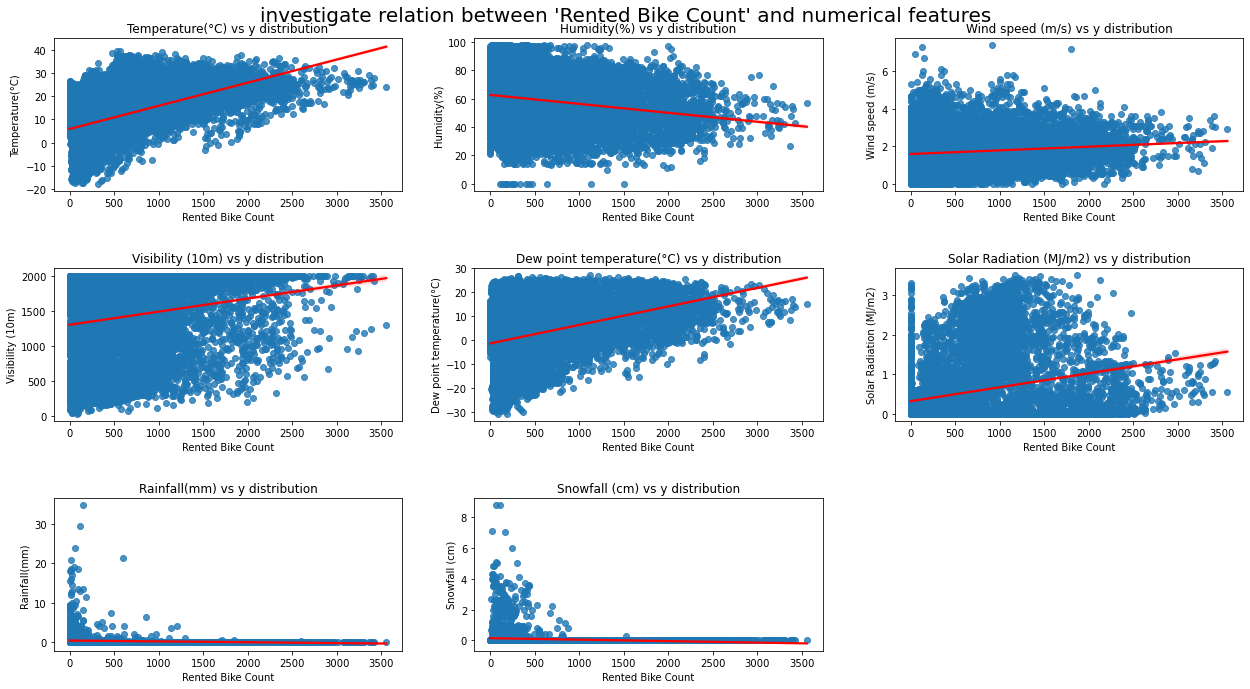

In [20]:
plt.subplots(2, 4,figsize=(18,10))

plt.subplots_adjust(top=1)
plt.suptitle("investigate relation between 'Rented Bike Count' and numerical features", fontsize=20) 


for i, col in enumerate(train[train.columns[3:-5]]):
    plt.subplot(3, 3, i+1)
    sns.regplot(x = train['Rented Bike Count'], y = train[col], line_kws = {'color': 'red'}).set_title("{} vs y distribution".format(col), fontsize=12);
    plt.tight_layout(pad=3.0)

###### Seasonal Renting

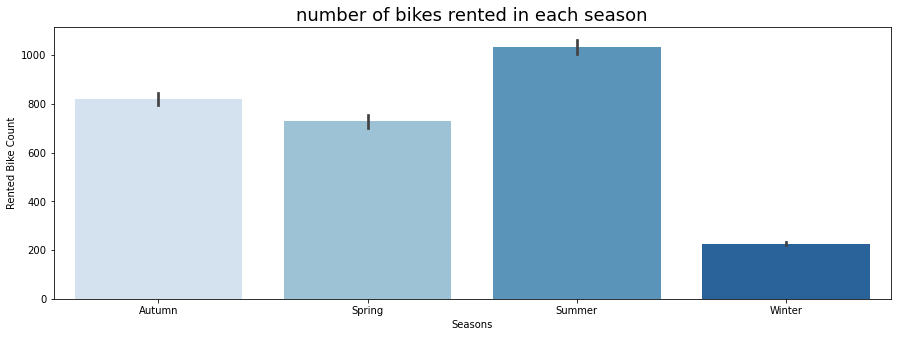

In [21]:
plt.figure(figsize=(15, 5))

sns.barplot(data = train, x = 'Seasons', y = 'Rented Bike Count', palette = 'Blues').set_title("number of bikes rented in each season", fontsize=18);

###### Rental demand per hour

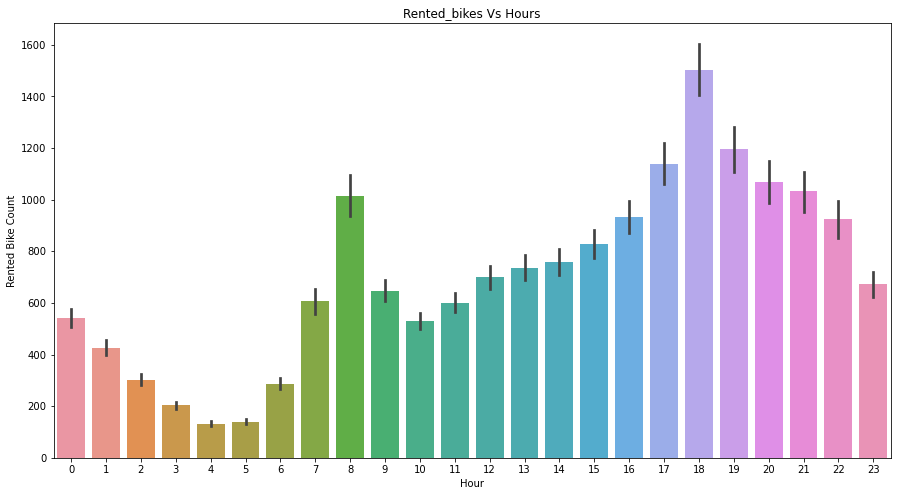

In [22]:
ig,ax=plt.subplots(figsize=(15,8))
#Bar plot for Hours distribution of counts
sns.barplot(data=train,x='Hour',y='Rented Bike Count')
ax.set_title('Rented_bikes Vs Hours')
plt.show()

###### YoY Rentals

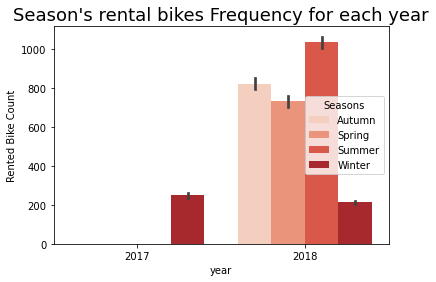

In [23]:
sns.barplot(data = train, x = 'year', y = 'Rented Bike Count', hue = 'Seasons', palette = 'Reds').set_title("Season's rental bikes Frequency for each year", fontsize=18);

###### Plotting Numerical features

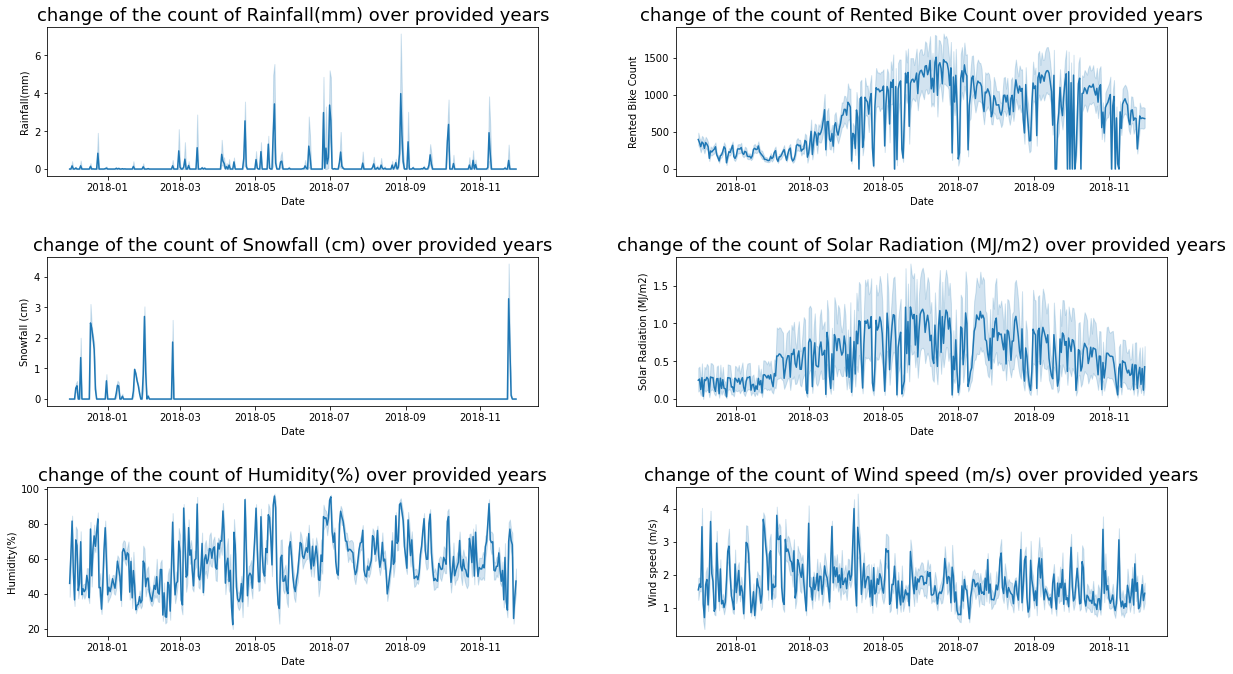

In [24]:
features_for_lp = ['Rainfall(mm)','Rented Bike Count','Snowfall (cm)','Solar Radiation (MJ/m2)','Humidity(%)','Wind speed (m/s)']

plt.subplots(3, 3,figsize=(18,10))
plt.subplots_adjust(top=1)
#plt.suptitle("investigate relation between 'y' and numerical features", fontsize=25) 

for i, col in enumerate(features_for_lp):
    plt.subplot(3, 2, i+1)
    sns.lineplot(data = train , x = 'Date', y=train[col]).set_title("change of the count of {} over provided years".format(col), fontsize=18);

    plt.tight_layout(pad=3.0)

###### Rental distribution on weekends-weekdays

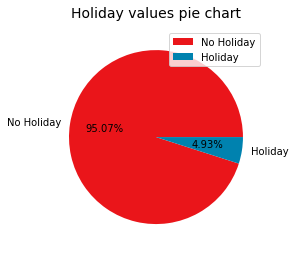

In [25]:
plt.pie(train.Holiday.value_counts(),
        labels=train.Holiday.unique(),
        autopct='%1.2f%%',
        colors=["#ea151a","#0082af"])

plt.title("Holiday values pie chart", y=1.02, fontsize=14)
plt.legend()
plt.show()

###### Number of rentals in consecutive years

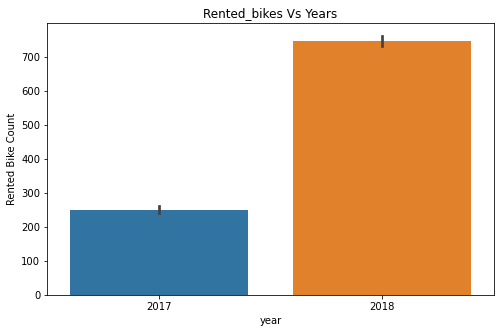

In [26]:
ig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data=train,x='year',y='Rented Bike Count')
ax.set_title('Rented_bikes Vs Years')
plt.show()

# Model building and evaluation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from scipy import stats
from scipy.stats import skew
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import LearningCurve
from sklearn import metrics

In [28]:
y=df['Rented Bike Count']
df=df.drop(['Rented Bike Count','Date'],axis =1)

In [29]:
X_train,X_valid,y_train,y_valid = train_test_split(df,y, test_size=0.2, random_state=42)
y_test = y_valid

# Predictive models

We plan to build multiple models here. Initially we have basic models and then we would use enhanced models to see how well they work on deriving the linear shape to get the best fit.

###### Why no PCA?
We tried PCA on multiple features, like temperature and dew, rainfall and visibility etc. That section is not included because the variance score after PCA was not more than 55-60%, which means we loose almost half of the information. If we try to save data and increase the variance score, the features were not reduced. So we don't include that PCA or dimension  reduction.

###### Evaluation 
For evaluation we have 2 graphs and 3 performance parameters, more about it will be discussed during evaluation of models.

###### Why Cross Validation score graphs?
Even if model is trained well and accuracy(or other performance matrices) is really good, there is a high chance that real world data might have a different distribution or exhibits different behaviour, which might result to inconistent performance. So, cross validation helps to tackle this problem by shuffling the data into folds and fit model on each of the fold and give better idea about how the model has been trained. 
Having a higher stable/increasing validation score is always preferred. This score might be less than the training/testing score.

# Model 1: Linear Regression

In [31]:
reg = LinearRegression().fit(X_train, y_train)
y_predicted = reg.predict(X_valid)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 282.5728904689284
MSE is 136092.76836325752
R2 score is 0.6733613409981323


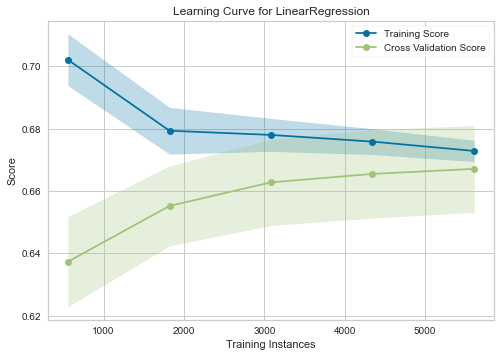

In [32]:
visualizer = LearningCurve(reg, scoring='r2')
visualizer.fit(X_train, y_train)
visualizer.show()

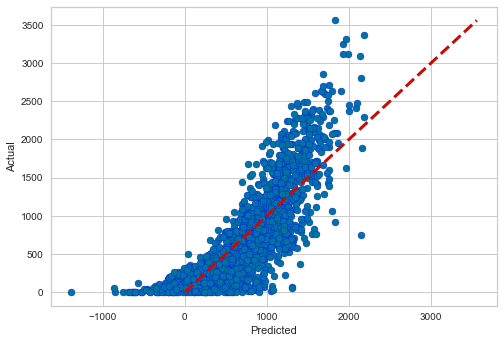

In [33]:
y_predicted = reg.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# Model 2: Neural Network Regressor

In [38]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

regr.score(X_valid, y_valid)

y_predicted = regr.predict(X_valid)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 245.97207198228202
MSE is 108747.64994465624
R2 score is 0.7389928430824904


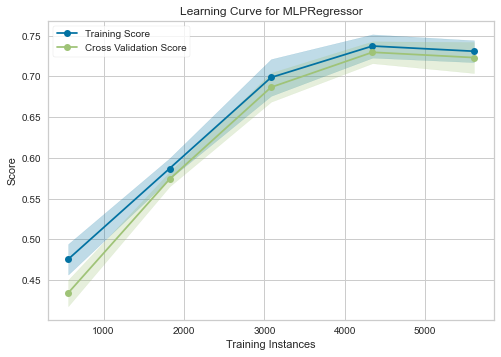

In [39]:
visualizer = LearningCurve(regr, scoring='r2')
visualizer.fit(X_train, y_train)
visualizer.show()

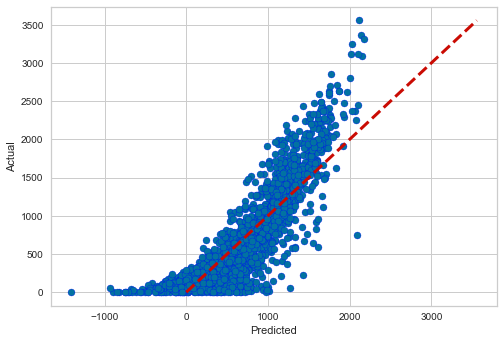

In [40]:
y_predicted = regr.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# Model 3: Decision Tree Regressor

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

y_predicted = regressor.predict(X_valid)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 148.37899543378995
MSE is 77471.11643835617
R2 score is 0.8140602040127645


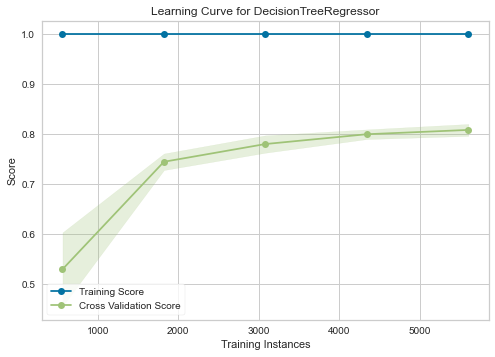

In [73]:
visualizer = LearningCurve(regressor, scoring='r2')
visualizer.fit(X_train, y_train)
visualizer.show()

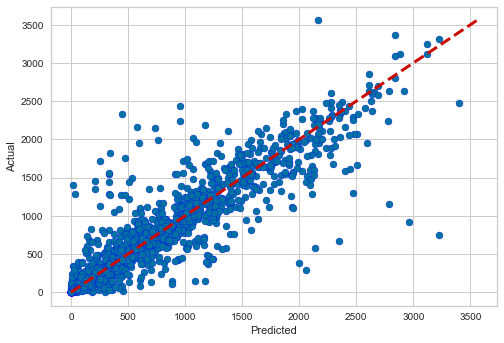

In [74]:
y_predicted = regressor.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

##### So far, after training 3 models, just by looking at the r2 scores we see Decision trees is leading with a high score. Let us see if we can optimise this even further and get a better fit by appling some enhanced algorithms. 

# Enhanced models

# Model 1: Random Forest Regressor

Since we saw that decision trees worked well, we choose random forest. Random forest is a algorithm that constructs and combines multiple decision trees and uses them while prediction.

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor().fit(X_train, y_train)

y_predicted = rf_model.predict(X_valid)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 112.94930365296803
MSE is 38230.43730239726
R2 score is 0.9082424516475526


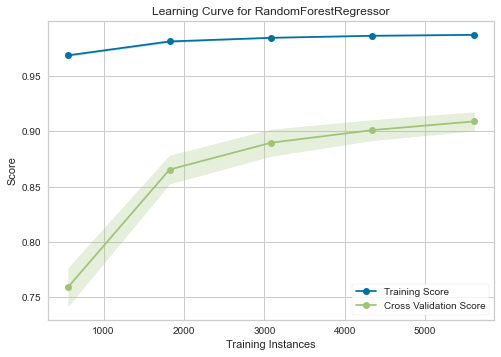

In [42]:
visualizer = LearningCurve(rf_model, scoring='r2')
visualizer.fit(X_train, y_train)
visualizer.show()

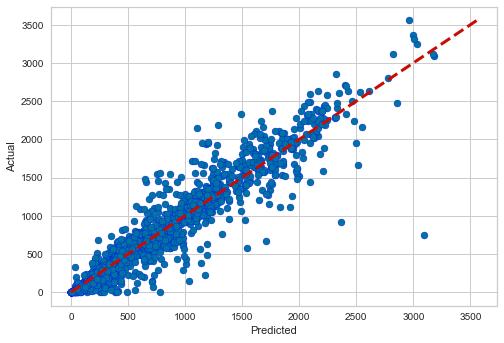

In [43]:
y_predicted = rf_model.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# Model 2: Extra Tree Regressor

Extra trees is similar in terms of random forest but does a better job when it comes to variance and computational power. 

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

ex_model = ExtraTreesRegressor().fit(X_train, y_train)

y_predicted = ex_model.predict(X_valid)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 95.08866438356164
MSE is 29883.61312534247
R2 score is 0.9282758118981155


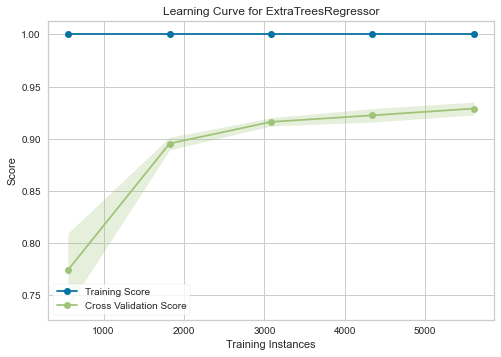

In [45]:
visualizer = LearningCurve(ex_model, scoring='r2')
visualizer.fit(X_train, y_train)
visualizer.show()

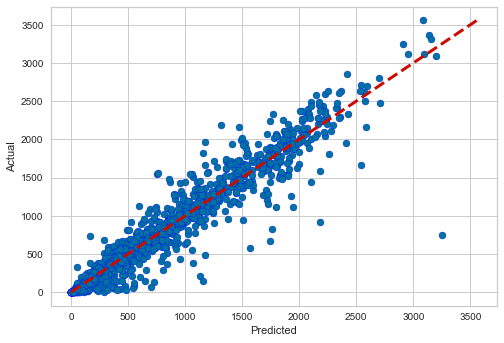

In [46]:
y_predicted = ex_model.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

As mentioned in introduction, extra trees deals with variance in a better way, due to which we see better scores as compared to Random Forest.

# Model 3: Ridge Regression

A variant of linear regression, which uses regularization while applying usual regression.

Here, we provide multiple aplha values, which mean we try to tweal the regularization strength. Let us see how it works.

In [47]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_valid)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 282.4334513591674
MSE is 136101.8306242841
R2 score is 0.6733395905052526


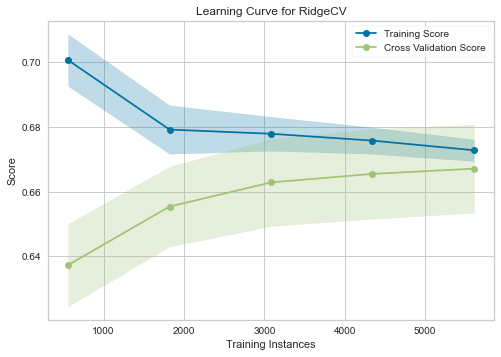

In [48]:
visualizer = LearningCurve(clf, scoring='r2')
visualizer.fit(X_train, y_train)
visualizer.show()

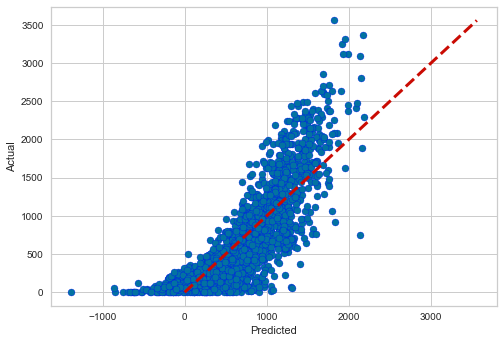

In [75]:
y_predicted = clf.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

As we see, the score is pretty similar to linear regression, even after applying various regularization parameters. 

# Model 4: Huber Regression

This is a special regression to deal with outlier values, when no major outlier treatment is applied during the preprocessing stage. As mentioned, we just used log transformation. So let us try applying this algorithm. 

In [50]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor().fit(X_train, y_train)
huber.score(X_train, y_train)

y_predicted = huber.predict(X_valid)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 343.81620655092917
MSE is 243346.7678904812
R2 score is 0.4159391208501171


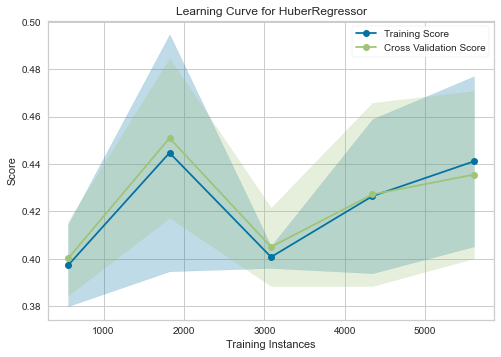

In [51]:
visualizer = LearningCurve(huber, scoring='r2')
visualizer.fit(X_train, y_train)
visualizer.show()

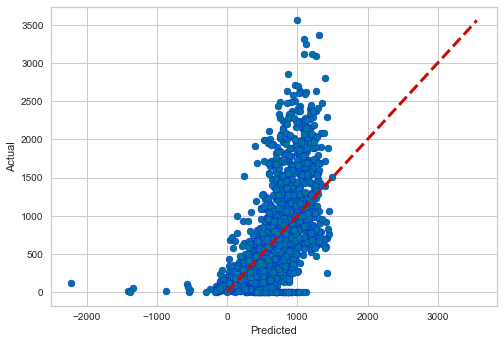

In [52]:
y_predicted = huber.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

The model performed poorly, especially in the cross validation and training score. And even worse is the fit that we are gettting in the end. 

# Model 5: XG Boost

This is mainly an implemntation of decision trees and gradient boosting on those trees. 

In [53]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)

y_predicted = XGB_model.predict(X_valid)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 110.91552500282181
MSE is 32521.58027480437
R2 score is 0.9219443803124836


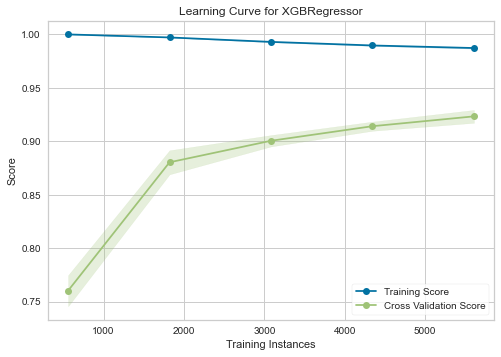

In [54]:
visualizer = LearningCurve(XGB_model , scoring='r2')
visualizer.fit(X_train, y_train)
visualizer.show()

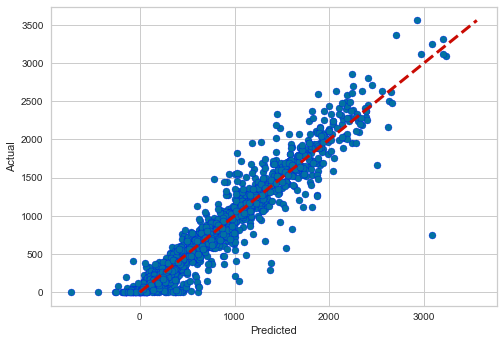

In [55]:
y_predicted = XGB_model.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# Model 6: Cat Boost

The speciality of cat boost is that it works well with categorical data and since we converted a lot of features into category type, using this is a good idea. 

###### Note: We couldn't plot the learning curve for this algorithm, as the library isn't supporting it yet. Instead, we print the training steps, which helps us see how is the process of converging. 

In [58]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=5000,
                          learning_rate=1,
                          depth=2)

model.fit(X_train, y_train)
y_predicted = model.predict(X_valid)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

0:	learn: 536.5956750	total: 1.87ms	remaining: 9.35s
1:	learn: 478.7521161	total: 3.89ms	remaining: 9.72s
2:	learn: 460.3783181	total: 5.56ms	remaining: 9.26s
3:	learn: 443.4654861	total: 7.46ms	remaining: 9.31s
4:	learn: 426.0356286	total: 9.23ms	remaining: 9.22s
5:	learn: 407.5611689	total: 11ms	remaining: 9.18s
6:	learn: 393.8642344	total: 12.8ms	remaining: 9.14s
7:	learn: 382.8944694	total: 14.7ms	remaining: 9.15s
8:	learn: 372.6031428	total: 16.4ms	remaining: 9.07s
9:	learn: 363.8962821	total: 17.8ms	remaining: 8.88s
10:	learn: 358.8537864	total: 19.3ms	remaining: 8.75s
11:	learn: 353.2992833	total: 20.7ms	remaining: 8.58s
12:	learn: 344.4646288	total: 22.3ms	remaining: 8.55s
13:	learn: 339.8941605	total: 23.6ms	remaining: 8.42s
14:	learn: 331.7823748	total: 25.2ms	remaining: 8.39s
15:	learn: 327.1419439	total: 26.7ms	remaining: 8.33s
16:	learn: 323.1896292	total: 28.4ms	remaining: 8.34s
17:	learn: 320.5965875	total: 30.3ms	remaining: 8.38s
18:	learn: 317.0771201	total: 32ms	remai

192:	learn: 211.3226186	total: 318ms	remaining: 7.92s
193:	learn: 211.2070595	total: 320ms	remaining: 7.92s
194:	learn: 211.0654449	total: 322ms	remaining: 7.93s
195:	learn: 211.0372796	total: 325ms	remaining: 7.97s
196:	learn: 210.9525546	total: 327ms	remaining: 7.97s
197:	learn: 210.8687947	total: 329ms	remaining: 7.99s
198:	learn: 210.6822338	total: 332ms	remaining: 8.02s
199:	learn: 210.5946036	total: 334ms	remaining: 8.02s
200:	learn: 210.5426362	total: 336ms	remaining: 8.02s
201:	learn: 210.4795923	total: 337ms	remaining: 8.02s
202:	learn: 210.3105763	total: 339ms	remaining: 8.01s
203:	learn: 210.0706383	total: 342ms	remaining: 8.03s
204:	learn: 209.4768219	total: 344ms	remaining: 8.05s
205:	learn: 209.4359953	total: 346ms	remaining: 8.05s
206:	learn: 209.3493050	total: 348ms	remaining: 8.05s
207:	learn: 209.2807501	total: 349ms	remaining: 8.04s
208:	learn: 209.1771768	total: 351ms	remaining: 8.04s
209:	learn: 208.3089620	total: 353ms	remaining: 8.05s
210:	learn: 208.2186026	tota

415:	learn: 184.2320541	total: 801ms	remaining: 8.82s
416:	learn: 184.1775755	total: 803ms	remaining: 8.82s
417:	learn: 184.1058551	total: 805ms	remaining: 8.82s
418:	learn: 184.0267133	total: 807ms	remaining: 8.82s
419:	learn: 183.9267959	total: 809ms	remaining: 8.82s
420:	learn: 183.7785607	total: 811ms	remaining: 8.82s
421:	learn: 183.6396991	total: 814ms	remaining: 8.83s
422:	learn: 183.5553356	total: 816ms	remaining: 8.82s
423:	learn: 183.4693294	total: 818ms	remaining: 8.82s
424:	learn: 183.3605417	total: 820ms	remaining: 8.83s
425:	learn: 183.3245613	total: 822ms	remaining: 8.82s
426:	learn: 183.2260102	total: 825ms	remaining: 8.83s
427:	learn: 183.1225726	total: 827ms	remaining: 8.84s
428:	learn: 183.0803352	total: 829ms	remaining: 8.84s
429:	learn: 183.0343815	total: 832ms	remaining: 8.84s
430:	learn: 182.9354908	total: 834ms	remaining: 8.84s
431:	learn: 182.9019909	total: 835ms	remaining: 8.83s
432:	learn: 182.8256907	total: 837ms	remaining: 8.83s
433:	learn: 182.7166969	tota

630:	learn: 168.8391433	total: 1.28s	remaining: 8.86s
631:	learn: 168.7958764	total: 1.28s	remaining: 8.86s
632:	learn: 168.7348405	total: 1.28s	remaining: 8.86s
633:	learn: 168.6924982	total: 1.28s	remaining: 8.86s
634:	learn: 168.6510604	total: 1.29s	remaining: 8.85s
635:	learn: 168.6052393	total: 1.29s	remaining: 8.85s
636:	learn: 168.5615558	total: 1.29s	remaining: 8.85s
637:	learn: 168.5252796	total: 1.29s	remaining: 8.85s
638:	learn: 168.4398060	total: 1.29s	remaining: 8.84s
639:	learn: 168.3882709	total: 1.3s	remaining: 8.84s
640:	learn: 168.3462043	total: 1.3s	remaining: 8.84s
641:	learn: 168.2762238	total: 1.3s	remaining: 8.86s
642:	learn: 168.2355223	total: 1.31s	remaining: 8.86s
643:	learn: 168.1941054	total: 1.31s	remaining: 8.86s
644:	learn: 168.1600442	total: 1.31s	remaining: 8.85s
645:	learn: 168.1546157	total: 1.31s	remaining: 8.86s
646:	learn: 168.1145164	total: 1.32s	remaining: 8.86s
647:	learn: 168.0711054	total: 1.32s	remaining: 8.86s
648:	learn: 167.9630921	total: 

841:	learn: 157.4245329	total: 1.76s	remaining: 8.7s
842:	learn: 157.4096311	total: 1.76s	remaining: 8.7s
843:	learn: 157.3519516	total: 1.77s	remaining: 8.7s
844:	learn: 157.3002011	total: 1.77s	remaining: 8.7s
845:	learn: 157.2766922	total: 1.77s	remaining: 8.7s
846:	learn: 157.2704687	total: 1.77s	remaining: 8.7s
847:	learn: 157.2636163	total: 1.78s	remaining: 8.7s
848:	learn: 157.2421910	total: 1.78s	remaining: 8.7s
849:	learn: 157.1896329	total: 1.78s	remaining: 8.7s
850:	learn: 157.1530270	total: 1.78s	remaining: 8.7s
851:	learn: 157.0589339	total: 1.79s	remaining: 8.71s
852:	learn: 157.0447886	total: 1.79s	remaining: 8.71s
853:	learn: 157.0145606	total: 1.8s	remaining: 8.73s
854:	learn: 156.9460026	total: 1.8s	remaining: 8.74s
855:	learn: 156.9376411	total: 1.81s	remaining: 8.74s
856:	learn: 156.8820852	total: 1.81s	remaining: 8.74s
857:	learn: 156.8595815	total: 1.81s	remaining: 8.74s
858:	learn: 156.8183028	total: 1.81s	remaining: 8.74s
859:	learn: 156.7769278	total: 1.81s	rem

1055:	learn: 149.8642268	total: 2.24s	remaining: 8.38s
1056:	learn: 149.8371555	total: 2.25s	remaining: 8.38s
1057:	learn: 149.8207413	total: 2.25s	remaining: 8.38s
1058:	learn: 149.7789677	total: 2.25s	remaining: 8.38s
1059:	learn: 149.7477906	total: 2.25s	remaining: 8.38s
1060:	learn: 149.7275230	total: 2.26s	remaining: 8.38s
1061:	learn: 149.7050354	total: 2.26s	remaining: 8.38s
1062:	learn: 149.6708687	total: 2.26s	remaining: 8.38s
1063:	learn: 149.6302799	total: 2.26s	remaining: 8.38s
1064:	learn: 149.5465494	total: 2.27s	remaining: 8.38s
1065:	learn: 149.5309750	total: 2.27s	remaining: 8.38s
1066:	learn: 149.5255508	total: 2.27s	remaining: 8.38s
1067:	learn: 149.4946930	total: 2.27s	remaining: 8.38s
1068:	learn: 149.4683902	total: 2.28s	remaining: 8.39s
1069:	learn: 149.4269619	total: 2.29s	remaining: 8.4s
1070:	learn: 149.3928320	total: 2.29s	remaining: 8.41s
1071:	learn: 149.3565745	total: 2.3s	remaining: 8.43s
1072:	learn: 149.3299659	total: 2.3s	remaining: 8.43s
1073:	learn: 

1231:	learn: 144.2186179	total: 2.73s	remaining: 8.34s
1232:	learn: 144.1879965	total: 2.73s	remaining: 8.33s
1233:	learn: 144.1522231	total: 2.73s	remaining: 8.33s
1234:	learn: 144.1162944	total: 2.73s	remaining: 8.33s
1235:	learn: 144.1146493	total: 2.73s	remaining: 8.33s
1236:	learn: 144.0696760	total: 2.73s	remaining: 8.32s
1237:	learn: 144.0315691	total: 2.74s	remaining: 8.32s
1238:	learn: 143.9975722	total: 2.74s	remaining: 8.32s
1239:	learn: 143.9722941	total: 2.74s	remaining: 8.32s
1240:	learn: 143.9515978	total: 2.75s	remaining: 8.32s
1241:	learn: 143.9139057	total: 2.75s	remaining: 8.32s
1242:	learn: 143.8856313	total: 2.75s	remaining: 8.32s
1243:	learn: 143.8708840	total: 2.76s	remaining: 8.32s
1244:	learn: 143.8476725	total: 2.76s	remaining: 8.32s
1245:	learn: 143.8321515	total: 2.76s	remaining: 8.33s
1246:	learn: 143.8319294	total: 2.77s	remaining: 8.33s
1247:	learn: 143.7922250	total: 2.77s	remaining: 8.32s
1248:	learn: 143.7707484	total: 2.77s	remaining: 8.32s
1249:	lear

1410:	learn: 137.3986541	total: 3.04s	remaining: 7.75s
1411:	learn: 137.3680277	total: 3.05s	remaining: 7.74s
1412:	learn: 137.3534886	total: 3.05s	remaining: 7.74s
1413:	learn: 137.3265094	total: 3.05s	remaining: 7.74s
1414:	learn: 137.2731675	total: 3.05s	remaining: 7.73s
1415:	learn: 137.2693724	total: 3.05s	remaining: 7.73s
1416:	learn: 137.2290188	total: 3.06s	remaining: 7.73s
1417:	learn: 137.1962453	total: 3.06s	remaining: 7.73s
1418:	learn: 137.1869821	total: 3.06s	remaining: 7.72s
1419:	learn: 137.1668356	total: 3.06s	remaining: 7.72s
1420:	learn: 137.1272925	total: 3.06s	remaining: 7.71s
1421:	learn: 137.0924059	total: 3.06s	remaining: 7.71s
1422:	learn: 137.0704032	total: 3.07s	remaining: 7.71s
1423:	learn: 137.0383767	total: 3.07s	remaining: 7.71s
1424:	learn: 137.0309159	total: 3.07s	remaining: 7.7s
1425:	learn: 137.0153624	total: 3.07s	remaining: 7.7s
1426:	learn: 136.9935416	total: 3.07s	remaining: 7.7s
1427:	learn: 136.9858931	total: 3.08s	remaining: 7.69s
1428:	learn: 

1581:	learn: 133.4747121	total: 3.37s	remaining: 7.29s
1582:	learn: 133.4482455	total: 3.38s	remaining: 7.29s
1583:	learn: 133.4453982	total: 3.38s	remaining: 7.29s
1584:	learn: 133.4152470	total: 3.38s	remaining: 7.29s
1585:	learn: 133.4014463	total: 3.38s	remaining: 7.29s
1586:	learn: 133.3855890	total: 3.39s	remaining: 7.29s
1587:	learn: 133.3827306	total: 3.39s	remaining: 7.28s
1588:	learn: 133.3739478	total: 3.39s	remaining: 7.28s
1589:	learn: 133.2311050	total: 3.39s	remaining: 7.28s
1590:	learn: 133.1937497	total: 3.4s	remaining: 7.28s
1591:	learn: 133.1798259	total: 3.4s	remaining: 7.28s
1592:	learn: 133.1633251	total: 3.4s	remaining: 7.28s
1593:	learn: 133.1315753	total: 3.4s	remaining: 7.28s
1594:	learn: 133.1020223	total: 3.41s	remaining: 7.28s
1595:	learn: 133.0735332	total: 3.41s	remaining: 7.28s
1596:	learn: 133.0591023	total: 3.42s	remaining: 7.29s
1597:	learn: 133.0267923	total: 3.42s	remaining: 7.29s
1598:	learn: 133.0253293	total: 3.42s	remaining: 7.28s
1599:	learn: 1

1758:	learn: 130.0167030	total: 3.84s	remaining: 7.08s
1759:	learn: 130.0120521	total: 3.84s	remaining: 7.07s
1760:	learn: 130.0015285	total: 3.84s	remaining: 7.07s
1761:	learn: 129.9875111	total: 3.85s	remaining: 7.07s
1762:	learn: 129.9649638	total: 3.85s	remaining: 7.07s
1763:	learn: 129.9511687	total: 3.85s	remaining: 7.07s
1764:	learn: 129.9303862	total: 3.85s	remaining: 7.06s
1765:	learn: 129.9193858	total: 3.85s	remaining: 7.06s
1766:	learn: 129.8921116	total: 3.86s	remaining: 7.06s
1767:	learn: 129.8629082	total: 3.86s	remaining: 7.05s
1768:	learn: 129.8500524	total: 3.86s	remaining: 7.05s
1769:	learn: 129.8267039	total: 3.86s	remaining: 7.05s
1770:	learn: 129.8140104	total: 3.87s	remaining: 7.05s
1771:	learn: 129.7718571	total: 3.87s	remaining: 7.04s
1772:	learn: 129.7455500	total: 3.87s	remaining: 7.04s
1773:	learn: 129.7212596	total: 3.87s	remaining: 7.04s
1774:	learn: 129.7032136	total: 3.87s	remaining: 7.04s
1775:	learn: 129.6936029	total: 3.87s	remaining: 7.03s
1776:	lear

1960:	learn: 126.4039534	total: 4.16s	remaining: 6.45s
1961:	learn: 126.4024817	total: 4.17s	remaining: 6.45s
1962:	learn: 126.4014313	total: 4.17s	remaining: 6.45s
1963:	learn: 126.3776735	total: 4.17s	remaining: 6.45s
1964:	learn: 126.3544818	total: 4.17s	remaining: 6.44s
1965:	learn: 126.3386142	total: 4.17s	remaining: 6.44s
1966:	learn: 126.3123016	total: 4.17s	remaining: 6.44s
1967:	learn: 126.2934887	total: 4.18s	remaining: 6.43s
1968:	learn: 126.2785603	total: 4.18s	remaining: 6.43s
1969:	learn: 126.2490504	total: 4.18s	remaining: 6.43s
1970:	learn: 126.2261745	total: 4.18s	remaining: 6.43s
1971:	learn: 126.2093310	total: 4.18s	remaining: 6.42s
1972:	learn: 126.2012909	total: 4.19s	remaining: 6.42s
1973:	learn: 126.1985720	total: 4.19s	remaining: 6.42s
1974:	learn: 126.1835597	total: 4.19s	remaining: 6.42s
1975:	learn: 126.1818223	total: 4.19s	remaining: 6.42s
1976:	learn: 126.1624520	total: 4.19s	remaining: 6.41s
1977:	learn: 126.1545077	total: 4.2s	remaining: 6.41s
1978:	learn

2150:	learn: 122.8688465	total: 4.49s	remaining: 5.95s
2151:	learn: 122.8574268	total: 4.49s	remaining: 5.95s
2152:	learn: 122.4819574	total: 4.5s	remaining: 5.95s
2153:	learn: 122.4376459	total: 4.5s	remaining: 5.94s
2154:	learn: 122.4200834	total: 4.5s	remaining: 5.94s
2155:	learn: 122.3963836	total: 4.5s	remaining: 5.94s
2156:	learn: 122.3915661	total: 4.5s	remaining: 5.93s
2157:	learn: 122.3650704	total: 4.5s	remaining: 5.93s
2158:	learn: 122.3467270	total: 4.51s	remaining: 5.93s
2159:	learn: 122.3146798	total: 4.51s	remaining: 5.93s
2160:	learn: 122.3101144	total: 4.51s	remaining: 5.92s
2161:	learn: 122.2928096	total: 4.51s	remaining: 5.92s
2162:	learn: 122.2917235	total: 4.51s	remaining: 5.92s
2163:	learn: 122.2768210	total: 4.52s	remaining: 5.92s
2164:	learn: 122.2723811	total: 4.52s	remaining: 5.92s
2165:	learn: 122.2635669	total: 4.52s	remaining: 5.92s
2166:	learn: 122.2615596	total: 4.52s	remaining: 5.91s
2167:	learn: 122.2556861	total: 4.52s	remaining: 5.91s
2168:	learn: 122

2313:	learn: 119.7624067	total: 4.82s	remaining: 5.6s
2314:	learn: 119.7514271	total: 4.83s	remaining: 5.6s
2315:	learn: 119.7309230	total: 4.83s	remaining: 5.59s
2316:	learn: 119.7114188	total: 4.83s	remaining: 5.59s
2317:	learn: 119.6982762	total: 4.83s	remaining: 5.59s
2318:	learn: 119.6745334	total: 4.83s	remaining: 5.59s
2319:	learn: 119.6719441	total: 4.84s	remaining: 5.59s
2320:	learn: 119.6703919	total: 4.84s	remaining: 5.58s
2321:	learn: 119.6693084	total: 4.84s	remaining: 5.58s
2322:	learn: 119.6633492	total: 4.84s	remaining: 5.58s
2323:	learn: 119.6535429	total: 4.85s	remaining: 5.58s
2324:	learn: 119.6233167	total: 4.85s	remaining: 5.58s
2325:	learn: 119.5971823	total: 4.86s	remaining: 5.58s
2326:	learn: 119.5931031	total: 4.86s	remaining: 5.58s
2327:	learn: 119.5680887	total: 4.86s	remaining: 5.58s
2328:	learn: 119.5567655	total: 4.86s	remaining: 5.58s
2329:	learn: 119.5478765	total: 4.86s	remaining: 5.57s
2330:	learn: 119.5459838	total: 4.87s	remaining: 5.57s
2331:	learn:

2509:	learn: 117.4205702	total: 5.15s	remaining: 5.11s
2510:	learn: 117.4137538	total: 5.15s	remaining: 5.11s
2511:	learn: 117.2370483	total: 5.15s	remaining: 5.1s
2512:	learn: 117.2169580	total: 5.15s	remaining: 5.1s
2513:	learn: 117.2158496	total: 5.16s	remaining: 5.1s
2514:	learn: 117.2144785	total: 5.16s	remaining: 5.1s
2515:	learn: 117.2078127	total: 5.16s	remaining: 5.09s
2516:	learn: 117.2063946	total: 5.16s	remaining: 5.09s
2517:	learn: 117.1823643	total: 5.16s	remaining: 5.09s
2518:	learn: 117.1671459	total: 5.16s	remaining: 5.09s
2519:	learn: 117.1535719	total: 5.17s	remaining: 5.08s
2520:	learn: 117.1501805	total: 5.17s	remaining: 5.08s
2521:	learn: 117.1476565	total: 5.17s	remaining: 5.08s
2522:	learn: 117.1406078	total: 5.17s	remaining: 5.08s
2523:	learn: 117.1383758	total: 5.17s	remaining: 5.08s
2524:	learn: 117.1365622	total: 5.18s	remaining: 5.07s
2525:	learn: 117.1208298	total: 5.18s	remaining: 5.07s
2526:	learn: 117.1028457	total: 5.18s	remaining: 5.07s
2527:	learn: 1

2663:	learn: 115.3861538	total: 5.47s	remaining: 4.8s
2664:	learn: 115.3778039	total: 5.48s	remaining: 4.8s
2665:	learn: 115.3682146	total: 5.48s	remaining: 4.8s
2666:	learn: 115.3567343	total: 5.48s	remaining: 4.79s
2667:	learn: 115.3476479	total: 5.48s	remaining: 4.79s
2668:	learn: 115.3334404	total: 5.48s	remaining: 4.79s
2669:	learn: 115.3292675	total: 5.49s	remaining: 4.79s
2670:	learn: 115.3283221	total: 5.49s	remaining: 4.79s
2671:	learn: 115.3271509	total: 5.49s	remaining: 4.78s
2672:	learn: 115.3057802	total: 5.49s	remaining: 4.78s
2673:	learn: 115.2958139	total: 5.49s	remaining: 4.78s
2674:	learn: 115.2901296	total: 5.5s	remaining: 4.78s
2675:	learn: 115.2753960	total: 5.5s	remaining: 4.78s
2676:	learn: 115.2499871	total: 5.5s	remaining: 4.77s
2677:	learn: 115.2494522	total: 5.5s	remaining: 4.77s
2678:	learn: 115.2380189	total: 5.5s	remaining: 4.77s
2679:	learn: 115.2209701	total: 5.51s	remaining: 4.77s
2680:	learn: 115.2046839	total: 5.51s	remaining: 4.76s
2681:	learn: 115.1

2845:	learn: 113.0886879	total: 5.79s	remaining: 4.38s
2846:	learn: 113.0572801	total: 5.79s	remaining: 4.38s
2847:	learn: 113.0433542	total: 5.79s	remaining: 4.38s
2848:	learn: 113.0371860	total: 5.8s	remaining: 4.38s
2849:	learn: 113.0213485	total: 5.8s	remaining: 4.38s
2850:	learn: 113.0145859	total: 5.8s	remaining: 4.37s
2851:	learn: 112.9994288	total: 5.8s	remaining: 4.37s
2852:	learn: 112.9968989	total: 5.8s	remaining: 4.37s
2853:	learn: 112.8465411	total: 5.81s	remaining: 4.37s
2854:	learn: 112.8338971	total: 5.81s	remaining: 4.36s
2855:	learn: 112.8171138	total: 5.81s	remaining: 4.36s
2856:	learn: 112.8040099	total: 5.81s	remaining: 4.36s
2857:	learn: 112.8028508	total: 5.82s	remaining: 4.36s
2858:	learn: 112.7967184	total: 5.82s	remaining: 4.36s
2859:	learn: 112.7957969	total: 5.82s	remaining: 4.35s
2860:	learn: 112.7944809	total: 5.82s	remaining: 4.35s
2861:	learn: 112.7813732	total: 5.82s	remaining: 4.35s
2862:	learn: 112.7800826	total: 5.82s	remaining: 4.35s
2863:	learn: 11

3013:	learn: 111.2076863	total: 6.12s	remaining: 4.03s
3014:	learn: 111.2012899	total: 6.12s	remaining: 4.03s
3015:	learn: 111.1789886	total: 6.12s	remaining: 4.03s
3016:	learn: 111.1715716	total: 6.13s	remaining: 4.03s
3017:	learn: 111.1702861	total: 6.13s	remaining: 4.03s
3018:	learn: 111.1636284	total: 6.13s	remaining: 4.02s
3019:	learn: 111.1557016	total: 6.13s	remaining: 4.02s
3020:	learn: 111.1483610	total: 6.13s	remaining: 4.02s
3021:	learn: 111.1436123	total: 6.14s	remaining: 4.02s
3022:	learn: 111.1352811	total: 6.14s	remaining: 4.01s
3023:	learn: 111.1118617	total: 6.14s	remaining: 4.01s
3024:	learn: 111.0989733	total: 6.14s	remaining: 4.01s
3025:	learn: 111.0880003	total: 6.14s	remaining: 4.01s
3026:	learn: 111.0777784	total: 6.15s	remaining: 4.01s
3027:	learn: 111.0611011	total: 6.15s	remaining: 4.01s
3028:	learn: 111.0388950	total: 6.16s	remaining: 4s
3029:	learn: 111.0346749	total: 6.16s	remaining: 4s
3030:	learn: 111.0345589	total: 6.16s	remaining: 4s
3031:	learn: 111.03

3185:	learn: 109.0391013	total: 6.44s	remaining: 3.67s
3186:	learn: 109.0217984	total: 6.44s	remaining: 3.67s
3187:	learn: 109.0078507	total: 6.45s	remaining: 3.66s
3188:	learn: 109.0047139	total: 6.45s	remaining: 3.66s
3189:	learn: 109.0034904	total: 6.45s	remaining: 3.66s
3190:	learn: 108.9760927	total: 6.45s	remaining: 3.66s
3191:	learn: 108.9673756	total: 6.45s	remaining: 3.65s
3192:	learn: 108.9454531	total: 6.45s	remaining: 3.65s
3193:	learn: 108.9387918	total: 6.46s	remaining: 3.65s
3194:	learn: 108.9115945	total: 6.46s	remaining: 3.65s
3195:	learn: 108.9042584	total: 6.46s	remaining: 3.65s
3196:	learn: 108.8945909	total: 6.46s	remaining: 3.64s
3197:	learn: 108.8703660	total: 6.46s	remaining: 3.64s
3198:	learn: 108.8566662	total: 6.47s	remaining: 3.64s
3199:	learn: 108.8523945	total: 6.47s	remaining: 3.64s
3200:	learn: 108.8491659	total: 6.47s	remaining: 3.64s
3201:	learn: 108.8415284	total: 6.47s	remaining: 3.63s
3202:	learn: 108.8400973	total: 6.48s	remaining: 3.63s
3203:	lear

3355:	learn: 107.6687410	total: 6.77s	remaining: 3.31s
3356:	learn: 107.6633077	total: 6.77s	remaining: 3.31s
3357:	learn: 107.6470069	total: 6.77s	remaining: 3.31s
3358:	learn: 107.6383435	total: 6.77s	remaining: 3.31s
3359:	learn: 107.6379057	total: 6.78s	remaining: 3.31s
3360:	learn: 107.6090568	total: 6.78s	remaining: 3.31s
3361:	learn: 107.6050123	total: 6.78s	remaining: 3.3s
3362:	learn: 107.5835376	total: 6.78s	remaining: 3.3s
3363:	learn: 107.5819261	total: 6.79s	remaining: 3.3s
3364:	learn: 107.5787839	total: 6.79s	remaining: 3.3s
3365:	learn: 107.5639385	total: 6.79s	remaining: 3.29s
3366:	learn: 107.5631795	total: 6.79s	remaining: 3.29s
3367:	learn: 107.5463799	total: 6.79s	remaining: 3.29s
3368:	learn: 107.5374836	total: 6.79s	remaining: 3.29s
3369:	learn: 107.5153226	total: 6.8s	remaining: 3.29s
3370:	learn: 107.4990554	total: 6.8s	remaining: 3.29s
3371:	learn: 107.4976721	total: 6.8s	remaining: 3.28s
3372:	learn: 107.4849109	total: 6.8s	remaining: 3.28s
3373:	learn: 107.4

3538:	learn: 106.1661107	total: 7.09s	remaining: 2.93s
3539:	learn: 106.1648276	total: 7.09s	remaining: 2.93s
3540:	learn: 106.1615610	total: 7.1s	remaining: 2.92s
3541:	learn: 106.1522277	total: 7.1s	remaining: 2.92s
3542:	learn: 106.1522196	total: 7.1s	remaining: 2.92s
3543:	learn: 106.1417336	total: 7.1s	remaining: 2.92s
3544:	learn: 106.1315124	total: 7.11s	remaining: 2.92s
3545:	learn: 106.1289511	total: 7.11s	remaining: 2.91s
3546:	learn: 106.1271606	total: 7.11s	remaining: 2.91s
3547:	learn: 106.1124906	total: 7.11s	remaining: 2.91s
3548:	learn: 106.1004011	total: 7.11s	remaining: 2.91s
3549:	learn: 106.0995638	total: 7.12s	remaining: 2.91s
3550:	learn: 106.0914248	total: 7.12s	remaining: 2.9s
3551:	learn: 106.0898218	total: 7.12s	remaining: 2.9s
3552:	learn: 106.0871451	total: 7.12s	remaining: 2.9s
3553:	learn: 106.0835945	total: 7.12s	remaining: 2.9s
3554:	learn: 106.0815426	total: 7.13s	remaining: 2.9s
3555:	learn: 106.0742866	total: 7.13s	remaining: 2.9s
3556:	learn: 106.069

3726:	learn: 104.6543451	total: 7.42s	remaining: 2.53s
3727:	learn: 104.6497104	total: 7.42s	remaining: 2.53s
3728:	learn: 104.6374981	total: 7.42s	remaining: 2.53s
3729:	learn: 104.6307655	total: 7.42s	remaining: 2.53s
3730:	learn: 104.6263305	total: 7.43s	remaining: 2.53s
3731:	learn: 104.6256628	total: 7.43s	remaining: 2.52s
3732:	learn: 104.6086734	total: 7.43s	remaining: 2.52s
3733:	learn: 104.6062504	total: 7.43s	remaining: 2.52s
3734:	learn: 104.5996521	total: 7.44s	remaining: 2.52s
3735:	learn: 104.5857981	total: 7.44s	remaining: 2.52s
3736:	learn: 104.5749363	total: 7.44s	remaining: 2.52s
3737:	learn: 104.5691426	total: 7.44s	remaining: 2.51s
3738:	learn: 104.5685994	total: 7.45s	remaining: 2.51s
3739:	learn: 104.5600305	total: 7.45s	remaining: 2.51s
3740:	learn: 104.5412968	total: 7.45s	remaining: 2.51s
3741:	learn: 104.5261544	total: 7.45s	remaining: 2.5s
3742:	learn: 104.5242108	total: 7.46s	remaining: 2.5s
3743:	learn: 104.5221257	total: 7.46s	remaining: 2.5s
3744:	learn: 

3911:	learn: 103.0004557	total: 7.74s	remaining: 2.15s
3912:	learn: 102.9936928	total: 7.74s	remaining: 2.15s
3913:	learn: 102.9869969	total: 7.74s	remaining: 2.15s
3914:	learn: 102.9769072	total: 7.74s	remaining: 2.15s
3915:	learn: 102.9704700	total: 7.75s	remaining: 2.14s
3916:	learn: 102.9679926	total: 7.75s	remaining: 2.14s
3917:	learn: 102.9607074	total: 7.75s	remaining: 2.14s
3918:	learn: 102.9596897	total: 7.75s	remaining: 2.14s
3919:	learn: 102.9558826	total: 7.75s	remaining: 2.14s
3920:	learn: 102.9409398	total: 7.75s	remaining: 2.13s
3921:	learn: 102.9295012	total: 7.76s	remaining: 2.13s
3922:	learn: 102.9288706	total: 7.76s	remaining: 2.13s
3923:	learn: 102.9150918	total: 7.76s	remaining: 2.13s
3924:	learn: 102.9112384	total: 7.76s	remaining: 2.13s
3925:	learn: 102.9093064	total: 7.76s	remaining: 2.12s
3926:	learn: 102.9087577	total: 7.76s	remaining: 2.12s
3927:	learn: 102.8994623	total: 7.77s	remaining: 2.12s
3928:	learn: 102.8980433	total: 7.77s	remaining: 2.12s
3929:	lear

4112:	learn: 101.5905009	total: 8.06s	remaining: 1.74s
4113:	learn: 101.5873558	total: 8.07s	remaining: 1.74s
4114:	learn: 101.5860356	total: 8.07s	remaining: 1.74s
4115:	learn: 101.5849344	total: 8.07s	remaining: 1.73s
4116:	learn: 101.5809235	total: 8.07s	remaining: 1.73s
4117:	learn: 101.5623956	total: 8.07s	remaining: 1.73s
4118:	learn: 101.5500355	total: 8.08s	remaining: 1.73s
4119:	learn: 101.5497535	total: 8.08s	remaining: 1.73s
4120:	learn: 101.5344485	total: 8.08s	remaining: 1.72s
4121:	learn: 101.5321969	total: 8.08s	remaining: 1.72s
4122:	learn: 101.5201076	total: 8.08s	remaining: 1.72s
4123:	learn: 101.5101346	total: 8.09s	remaining: 1.72s
4124:	learn: 101.5048301	total: 8.09s	remaining: 1.72s
4125:	learn: 101.4977369	total: 8.09s	remaining: 1.71s
4126:	learn: 101.4890987	total: 8.09s	remaining: 1.71s
4127:	learn: 101.4770855	total: 8.1s	remaining: 1.71s
4128:	learn: 101.4750521	total: 8.1s	remaining: 1.71s
4129:	learn: 101.4650517	total: 8.1s	remaining: 1.71s
4130:	learn: 

4288:	learn: 100.2336804	total: 8.39s	remaining: 1.39s
4289:	learn: 100.2017583	total: 8.39s	remaining: 1.39s
4290:	learn: 100.2009679	total: 8.39s	remaining: 1.39s
4291:	learn: 100.1957806	total: 8.39s	remaining: 1.38s
4292:	learn: 100.1956744	total: 8.4s	remaining: 1.38s
4293:	learn: 100.1863092	total: 8.4s	remaining: 1.38s
4294:	learn: 100.1822081	total: 8.4s	remaining: 1.38s
4295:	learn: 100.1808919	total: 8.4s	remaining: 1.38s
4296:	learn: 100.1759888	total: 8.41s	remaining: 1.38s
4297:	learn: 100.1711387	total: 8.41s	remaining: 1.37s
4298:	learn: 100.1420383	total: 8.41s	remaining: 1.37s
4299:	learn: 100.1333808	total: 8.41s	remaining: 1.37s
4300:	learn: 100.1290318	total: 8.41s	remaining: 1.37s
4301:	learn: 100.1289128	total: 8.42s	remaining: 1.37s
4302:	learn: 100.1236593	total: 8.42s	remaining: 1.36s
4303:	learn: 100.1208392	total: 8.42s	remaining: 1.36s
4304:	learn: 100.1179389	total: 8.43s	remaining: 1.36s
4305:	learn: 100.1156682	total: 8.43s	remaining: 1.36s
4306:	learn: 1

4456:	learn: 99.1727000	total: 8.71s	remaining: 1.06s
4457:	learn: 99.1593094	total: 8.71s	remaining: 1.06s
4458:	learn: 99.1518747	total: 8.71s	remaining: 1.06s
4459:	learn: 99.1426407	total: 8.71s	remaining: 1.05s
4460:	learn: 99.1416969	total: 8.72s	remaining: 1.05s
4461:	learn: 99.1398545	total: 8.72s	remaining: 1.05s
4462:	learn: 99.1308439	total: 8.72s	remaining: 1.05s
4463:	learn: 99.1276196	total: 8.72s	remaining: 1.05s
4464:	learn: 99.1173627	total: 8.72s	remaining: 1.04s
4465:	learn: 99.1112420	total: 8.72s	remaining: 1.04s
4466:	learn: 99.1103948	total: 8.73s	remaining: 1.04s
4467:	learn: 99.0983233	total: 8.73s	remaining: 1.04s
4468:	learn: 99.0845223	total: 8.73s	remaining: 1.04s
4469:	learn: 99.0673800	total: 8.73s	remaining: 1.03s
4470:	learn: 99.0671854	total: 8.73s	remaining: 1.03s
4471:	learn: 99.0634362	total: 8.74s	remaining: 1.03s
4472:	learn: 99.0629698	total: 8.74s	remaining: 1.03s
4473:	learn: 99.0554374	total: 8.74s	remaining: 1.03s
4474:	learn: 99.0497147	tota

4647:	learn: 97.6276593	total: 9.04s	remaining: 684ms
4648:	learn: 97.6268930	total: 9.04s	remaining: 682ms
4649:	learn: 97.6168016	total: 9.04s	remaining: 680ms
4650:	learn: 97.6150474	total: 9.04s	remaining: 678ms
4651:	learn: 97.6035484	total: 9.04s	remaining: 676ms
4652:	learn: 97.6029643	total: 9.04s	remaining: 674ms
4653:	learn: 97.6001682	total: 9.04s	remaining: 673ms
4654:	learn: 97.5912088	total: 9.05s	remaining: 671ms
4655:	learn: 97.5815640	total: 9.05s	remaining: 669ms
4656:	learn: 97.5807739	total: 9.05s	remaining: 667ms
4657:	learn: 97.5710686	total: 9.05s	remaining: 665ms
4658:	learn: 97.5707688	total: 9.05s	remaining: 663ms
4659:	learn: 97.5684740	total: 9.06s	remaining: 661ms
4660:	learn: 97.5648967	total: 9.06s	remaining: 659ms
4661:	learn: 97.5642538	total: 9.06s	remaining: 657ms
4662:	learn: 97.5636187	total: 9.06s	remaining: 655ms
4663:	learn: 97.5567493	total: 9.06s	remaining: 653ms
4664:	learn: 97.5473559	total: 9.06s	remaining: 651ms
4665:	learn: 97.5468240	tota

4893:	learn: 96.0055395	total: 9.52s	remaining: 206ms
4894:	learn: 95.9979790	total: 9.52s	remaining: 204ms
4895:	learn: 95.9976509	total: 9.52s	remaining: 202ms
4896:	learn: 95.9911712	total: 9.52s	remaining: 200ms
4897:	learn: 95.9776249	total: 9.53s	remaining: 198ms
4898:	learn: 95.9753815	total: 9.53s	remaining: 196ms
4899:	learn: 95.9688286	total: 9.53s	remaining: 194ms
4900:	learn: 95.9607846	total: 9.53s	remaining: 193ms
4901:	learn: 95.9497345	total: 9.53s	remaining: 191ms
4902:	learn: 95.9417052	total: 9.53s	remaining: 189ms
4903:	learn: 95.9183826	total: 9.54s	remaining: 187ms
4904:	learn: 95.9120194	total: 9.54s	remaining: 185ms
4905:	learn: 95.8758774	total: 9.54s	remaining: 183ms
4906:	learn: 95.7351312	total: 9.54s	remaining: 181ms
4907:	learn: 95.7342927	total: 9.54s	remaining: 179ms
4908:	learn: 95.7274325	total: 9.54s	remaining: 177ms
4909:	learn: 95.7265780	total: 9.55s	remaining: 175ms
4910:	learn: 95.7257721	total: 9.55s	remaining: 173ms
4911:	learn: 95.7243971	tota

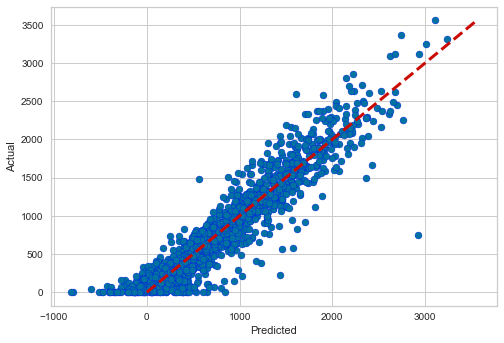

In [60]:
y_predicted = model.predict(X_valid)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_valid, edgecolors=(0, 0, 1))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

## Evaluation:

##### MAE: This measures the average absolute difference between actual and predicted values from the dataset. (Lower the better)

##### MSE: This measures the squared effor difference between original and predicted values but keeps into consideration the variance of residuals. (Lower the better)

##### R2 score: This is amount of variance between features and output variable, and often used to evaluate performance of regression based problems. (Higher the better) 

##### Plan for evaluation:
- Sort the highest R2 score
- Check the corresponding MAE and MSE
- Check the cross validation score line and see how it has converged(smoother convergance is better than spikes)
- Check the graph of best for curve and make sure it keeps no outliers


##### So here are the scores:

In [76]:
evaluation_dict = {'Linear Regression':[282.572,136092.768,67.73],'Neural Network':[245.972,108747.649,73.89],'Decision Trees':[148.378,77471.116,81.40],'Random Forest':[112.949,38239.437,90.82],'Extra Tree':[95.088,29883.613,92.80],'Ridge Regression':[282.433,136101.83,67.33],'Huber Regression':[343.816,243346.76,41.59],'XG Boost':[110.915,32521.580,92.19],'Cat Boost':[149.407,46273.1707,88.89]}

In [77]:
n = pd.DataFrame.from_dict(evaluation_dict, orient='index')
n = n.rename(columns={0: "MAE", 1: "MSE",2:'R2 score'})

In [78]:
n

,MAE,MSE,R2 score
Linear Regression,282.572,136092.7680,67.73
Neural Network,245.972,108747.6490,73.89
Decision Trees,148.378,77471.1160,81.40
Random Forest,112.949,38239.4370,90.82
Extra Tree,95.088,29883.6130,92.80
Ridge Regression,282.433,136101.8300,67.33
Huber Regression,343.816,243346.7600,41.59
XG Boost,110.915,32521.5800,92.19
Cat Boost,149.407,46273.1707,88.89


As per out plan, we select 4 models based on our evaluation parameters.

1) Random Forest
2) Extra Tree
3) XG Boost
4) Cat Boost

The final selection is between `Extra Tree` and `XG Boost`.

Based on the evaluation plan mentioned, we select ` Extra Tree ` as our final model.
We see Extra Tree has significantly less MAE and MSE scores, even if it has similar R2 score as compared to XG boost. Also in the training-validation curve, we see XG boost had the training score decrease in the end, which suggests some kind of overfitting and ardent model behaviour. 

Also, the best fit curve is more or less same for both the algorithms, but some datapoints towards extreme ends are better taken care off by Extra Trees(which is also the reason of less MAE and MSE scores)

###### Hence we conclude by choosing Extra Tree as the best algorithm for this dataset. 